<a href="https://colab.research.google.com/github/belanasaikiran/Team-6-Big-Data-Project/blob/main/temp/Car_Make_Model_Detection_Classification_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Model Detection:

### Team 6:

## Todo:
- [x] Import the DataSet.
- [x] Preprocessing
- [ ] Feature Selection
- [ ] Model Selection
- [ ] Training the Model

In [1]:
# !rm -r DataSet/ A Simple reset call to delete DataSet folder. Use it at caution

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# !unzip gdrive/MyDrive/DataSet/DataSet.zip > /dev/null # output to null
!unzip gdrive/MyDrive/Big\ Data\ Analytics\ Project\ \(Team6\)/DataSet/DataSet.zip > /dev/null # output to null

Checking if image dataset is loaded

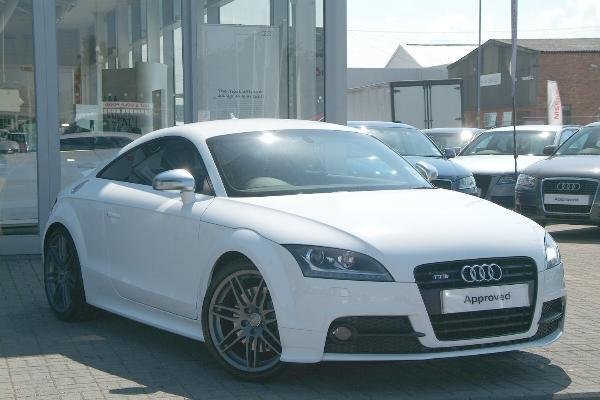

In [4]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('DataSet/images/cars_train/00001.jpg')
img

In [5]:
print(img.width, img.height)

600 400


In [6]:
import numpy as np
import pandas as pd

In [7]:
metadata = pd.read_csv("DataSet/data/meta.csv")

In [8]:
print("Meta Data: \n")
print("Head:")
print(metadata.head())
print("\n Info:")
print(metadata.info())
print("\n Columns:")
print(metadata.columns)

Meta Data: 

Head:
   Unnamed: 0                  class_name
0           1  AM General Hummer SUV 2000
1           2         Acura RL Sedan 2012
2           3         Acura TL Sedan 2012
3           4        Acura TL Type-S 2008
4           5        Acura TSX Sedan 2012

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  196 non-null    int64 
 1   class_name  196 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB
None

 Columns:
Index(['Unnamed: 0', 'class_name'], dtype='object')


## Load the Train & Test Datasets

### Train Data

In [9]:
train_data = pd.read_csv("DataSet/data/train.csv")

print("\n Train Data: \nHead: ")
train_data.head()
print("\nDescribe:")
print(train_data.describe())
print("\nInfo:")
print(train_data.info())
print("\nColumns:")
print(train_data.columns)
print("\nShape:")
print(train_data.shape)


 Train Data: 
Head: 

Describe:
         Unnamed: 0            x1            y1            x2            y2  \
count  12948.000000  12948.000000  12948.000000  12948.000000  12948.000000   
mean    3451.892339     64.701189    108.592833    638.598625    416.670683   
std     2200.262018     81.774972    106.195279    409.613163    272.818630   
min        0.000000      1.000000      1.000000     76.000000     41.000000   
25%     1618.000000     19.000000     42.000000    394.000000    250.000000   
50%     3236.500000     39.000000     80.000000    572.000000    361.000000   
75%     4906.250000     78.000000    138.000000    742.250000    475.000000   
max     8143.000000   1648.000000   1651.000000   5205.000000   3389.000000   

              class  
count  12948.000000  
mean      99.008573  
std       56.540538  
min        1.000000  
25%       50.000000  
50%       99.000000  
75%      148.000000  
max      196.000000  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

### Test Data

In [10]:
test_data = pd.read_csv("DataSet/data/test.csv") #load test data


print("\n Test Data: \nHead: ")
test_data.head()
print("\nDescribe:")
print(test_data.describe())
print("\nInfo:")
print(test_data.info())
print("\nColumns:")
print(test_data.columns)
print("\nShape:")
print(test_data.shape)


 Test Data: 
Head: 

Describe:
        Unnamed: 0           x1           y1           x2           y2  \
count  3237.000000  3237.000000  3237.000000  3237.000000  3237.000000   
mean   1618.000000    66.103491   106.835650   639.691999   417.637010   
std     934.585737    84.198376   106.736782   417.499266   279.758425   
min       0.000000     1.000000     1.000000    72.000000    49.000000   
25%     809.000000    18.000000    40.000000   389.000000   242.000000   
50%    1618.000000    39.000000    77.000000   573.000000   363.000000   
75%    2427.000000    80.000000   135.000000   763.000000   487.000000   
max    3236.000000   872.000000  1311.000000  7224.000000  3835.000000   

             class  
count  3237.000000  
mean     98.852950  
std      56.359186  
min       1.000000  
25%      51.000000  
50%      99.000000  
75%     148.000000  
max     196.000000  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3237 entries, 0 to 3236
Data columns (total 7 columns):

### Fixing the `fname` for one of the value in CSV

In [11]:
# fix the file names here
train_data.loc[9998, 'fname'] = '09999.jpg'

Split data into Training and validation set

In [12]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [13]:
train_data, validation_data = train_test_split(train_data, test_size=3237, shuffle=False) # Split the training Dataframe to train and validation

In [14]:
print("Training set size:", train_data.shape)
print("Validation set size:", validation_data.shape)

Training set size: (9711, 7)
Validation set size: (3237, 7)


In [15]:
print("\n Train Data: \nHead: ")
train_data.head()
print("\nDescribe:")
print(train_data.describe())
print("\nInfo:")
print(train_data.info())
print("\nColumns:")
print(train_data.columns)
print("\nShape:")
print(train_data.shape)


 Train Data: 
Head: 

Describe:
        Unnamed: 0           x1           y1           x2           y2  \
count  9711.000000  9711.000000  9711.000000  9711.000000  9711.000000   
mean   3540.856451    64.116775   108.241582   637.580579   415.954691   
std    2476.345065    80.409022   104.887139   408.975703   272.742283   
min       0.000000     1.000000     1.000000    76.000000    41.000000   
25%    1213.500000    19.000000    42.000000   392.000000   248.000000   
50%    3288.000000    39.000000    79.000000   571.000000   361.000000   
75%    5715.500000    78.000000   138.000000   744.000000   476.000000   
max    8143.000000  1648.000000  1651.000000  5205.000000  3389.000000   

             class  
count  9711.000000  
mean     99.075275  
std      56.606892  
min       1.000000  
25%      50.000000  
50%      99.000000  
75%     148.000000  
max     196.000000  

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9711 entries, 0 to 9710
Data columns (total 7 columns):
 # 

In [16]:
print("\n Validation Data: \nHead: ")
validation_data.head()
print("\nDescribe:")
print(validation_data.describe())
print("\nInfo:")
print(validation_data.info())
print("\nColumns:")
print(validation_data.columns)
print("\nShape:")
print(validation_data.shape)


 Validation Data: 
Head: 

Describe:
        Unnamed: 0           x1           y1           x2           y2  \
count  3237.000000  3237.000000  3237.000000  3237.000000  3237.000000   
mean   3185.000000    66.454433   109.646586   641.652765   418.818659   
std     934.585737    85.731295   110.036304   411.567890   273.078438   
min    1567.000000     1.000000     1.000000    89.000000    46.000000   
25%    2376.000000    20.000000    41.000000   401.000000   256.000000   
50%    3185.000000    40.000000    81.000000   574.000000   365.000000   
75%    3994.000000    79.000000   139.000000   739.000000   473.000000   
max    4803.000000  1048.000000  1646.000000  4238.000000  2994.000000   

             class  
count  3237.000000  
mean     98.808465  
std      56.349259  
min       1.000000  
25%      50.000000  
50%      99.000000  
75%     148.000000  
max     196.000000  

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3237 entries, 9711 to 12947
Data columns (total 7 colu

# Data Preprocessing


**Let's get an Average of images available per class**

We should get around 66 images per class with the `stanford car dataset`

In [17]:
counter = 0 #no. of images available per class in our dataset
average = 0 #average no. of images availabe for all our classes for training

for y in range(1, 197):
  for x in train_data['class']:
    if (x == y):
      # print("x, y", x, y)
      counter = counter+1;
  average = (average + counter)/y


print("Average:", average)

Average: 49.80002114329211


In [18]:
from PIL import Image
import os, shutil

Move images from cars_train folder to cars_validation folder

In [19]:
cars_train_images_dir = '/content/DataSet/images/cars_train/'
cars_valid_images_dir = '/content/DataSet/images/cars_validation/'

# create validation directory if does not exist
if not os.path.exists(cars_valid_images_dir):
  os.makedirs(cars_valid_images_dir)

In [20]:
for filename in validation_data['fname']:
  source_path = os.path.join(cars_train_images_dir, filename)
  destination_path = os.path.join(cars_valid_images_dir, filename)

  # move the file
  shutil.move(source_path, destination_path)

Before we resize the images, Let's see the small resolution image available in the dataset to avoid any mis handling of images during the training phase of dataset

In [21]:
temp_width = 190000 # some random value which should be high to compare and get the smallest width(px size) of the available images in the dataset
temp_height = 19000

smallest_width_image = ""
smallest_height_image = ""


def ImageSizeChecker():
  global temp_width, temp_height, smallest_height_image, smallest_width_image
  # print(train_data['fname'][0])
  for i in range(1, len(train_data)):
    image_path = "/content/DataSet/images/cars_train/" + train_data['fname'][i]
    img = tf.keras.preprocessing.image.load_img(image_path)
    # print(img.width, img.height)
    if (img.width < temp_width):
      temp_width = img.width
      smallest_width_image = train_data['fname'][i]
      # print("Image Width Size for ", i, "th image: ",  temp_width)
    if (img.height < temp_height):
      temp_height = img.width
      smallest_height_image = train_data['fname'][i]
      # print("Image height Size for ", i, "th image: ",  temp_width)
    if i == len(train_data)-1:
      print("END")
      print(temp_width, temp_height)
      print(smallest_width_image, smallest_height_image)


ImageSizeChecker()



END
78 112
00097.jpg 09711.jpg


Checking which images have low resolution

train_data name 00097.jpg
train_data name 09711.jpg


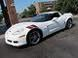

In [22]:
small_image_1 = 'DataSet/images/cars_train/' + train_data['fname'][96]
print("train_data name", train_data['fname'][96])
img1 = tf.keras.preprocessing.image.load_img(small_image_1)


small_image_2 = 'DataSet/images/cars_train/' + train_data['fname'][9710]
print("train_data name", train_data['fname'][9710])
img2 = tf.keras.preprocessing.image.load_img(small_image_2)
img1

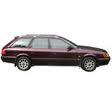

In [23]:
img2

### Crop and Resize the Training DataSet images to 224x224 pixels:

> *Cropping the images using bounding boxes and separating the images into their respective folders accoringly.*

*   Read the dataset from CSV file
*   Iterate over each image, resize it and its bounding box in CSV
*   **Crop the image using bounding box coordinates**
*   Resize the croppedImage to 224x224 pixels (CNNs can easily train on square images)
*   Save the cropped resize image
*   ~~Update the bounding box coordinates in the new dataframe called `train_data_resized`.~~

> *Resizing the dataset to a square size  helps in training the model much faster as we deal with image datasets which inturn uses matrix multiplications for this type of problem*




> ***Choosing 224x224 as an ideal choice since it may contain more details of each car for classification***

In [24]:
new_size = (224,224)

In [25]:
import os, shutil, pathlib

In [26]:
# Image Cropper Function
def ImageCropper(save_path, class_name, image_path, x1, y1, x2, y2):
  im = Image.open(image_path);
  croppedImage = im.crop((x1, y1, x2, y2))

  # print("Cropping Finished")
  filename = os.path.basename(image_path)
  # class_image_save_path = save_path + "/" + str(class_name) + "/" # this line separates all the images to separate folders according to the class no.
  class_image_save_path = save_path + "/" + str(class_name) + "/"

  if not os.path.exists(class_image_save_path):
    os.makedirs(class_image_save_path)

  resized_image = croppedImage.resize(new_size)

  #save the resized image
  if not os.path.exists(class_image_save_path):
    os.makedirs(class_image_save_path)

  resized_image.save(os.path.join(class_image_save_path, filename))



In [27]:
!rm -r DataSet/croppedResizedImages/

rm: cannot remove 'DataSet/croppedResizedImages/': No such file or directory


In [28]:
# dataset folder
train_dataset_image_folder = 'DataSet/images/cars_train/'
validation_dataset_image_folder = 'DataSet/images/cars_validation/'
test_dataset_image_folder = 'DataSet/images/cars_test/'

train_cropped_images_save_path ='DataSet/croppedResizedImages/train' #setting a custom path for storing the resized data
validation_cropped_images_save_path ='DataSet/croppedResizedImages/validation' #setting a custom path for storing the resized data
test_cropped_images_save_path ='DataSet/croppedResizedImages/test' #setting a custom path for storing the resized data

In [29]:
print(len(train_data))

9711


In [32]:
# process each image - cropping

def processCrop(crop_images_save_path, dataset_image_folder, data_df):
  for index, row in data_df.iterrows():

    # Call the image cropper function
    ImageCropper(crop_images_save_path, data_df['class'][index] , dataset_image_folder + data_df['fname'][index], data_df['x1'][index], data_df['y1'][index], data_df['x2'][index], data_df['y2'][index])

    if index == len(data_df) - 1:
      print(crop_images_save_path, ": All Images have been cropped")



In [33]:
processCrop(train_cropped_images_save_path, train_dataset_image_folder, train_data)
processCrop(validation_cropped_images_save_path, validation_dataset_image_folder, validation_data)
processCrop(test_cropped_images_save_path, test_dataset_image_folder, test_data)

DataSet/croppedResizedImages/train : All Images have been cropped
DataSet/croppedResizedImages/test : All Images have been cropped


Using `image_dataset_from_directort` to read the cropped and resized images

Creating a variable for resized data that we can use to update the bounding box information

In [34]:
from keras.utils import image_dataset_from_directory
cropped_dataset_directory = "/content/DataSet/croppedResizedImages/"

train_dataset = image_dataset_from_directory(
    cropped_dataset_directory + "/train",
    image_size=(224, 224),
)
validation_dataset = image_dataset_from_directory(
    cropped_dataset_directory + "/validation",
    image_size=(224, 224),
)
test_dataset = image_dataset_from_directory(
    cropped_dataset_directory + "/test",
    image_size=(224, 224),
)

Found 9711 files belonging to 196 classes.
Found 3237 files belonging to 196 classes.
Found 3237 files belonging to 196 classes.


In [35]:
# !ls DataSet/images/cars_train #uncomment to see the no. of images we have

In [36]:
# !ls DataSet/resized_images/ #let's see the count of resized cropped images.

## Check the resized image.

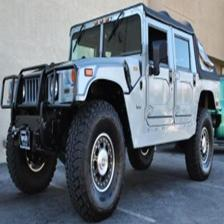

In [37]:
scaled_img = tf.keras.preprocessing.image.load_img('DataSet/croppedResizedImages/train/1/00163.jpg')
scaled_img

#Prepare the Data for Machine Learning Algorithms

Checking we have any missing value

In [38]:
sample_incomplete_rows = train_data[train_data.isnull().any(axis=1)].head() #maybe we don't have any missing data
pd.set_option('display.max_columns', None)
sample_incomplete_rows

,Unnamed: 0,x1,y1,x2,y2,class,fname


> WE DON'T HAVE TO DO NORMALIZATION AS WE DID IT WHEN WE RESIZED THE IMAGES TO SAME RESOLUTION


### This step helps in training the transfer learning model much easier.

# Load all the Images to start traning


In [39]:
import cv2  # Or from PIL import Image  if using Pillow

Define data paths

In [40]:
image_train_data_dir = "DataSet/croppedResizedImages/train"
image_validation_data_dir = "DataSet/croppedResizedImages/validation"
image_test_data_dir = "DataSet/croppedResizedImages/test"

In [41]:
def load_image(filepath, target_size=(224, 224)):  # Adjust target size if needed
    img = cv2.imread(filepath)  # Or img = Image.open(filepath) for Pillow
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if using OpenCV
    img = cv2.resize(img, target_size)
    return img

### Prepare Training Data

Creating a dictionary to map image filenames to their corresponding class labels

In [42]:
image_label_map = dict(zip(train_data["fname"], train_data["class"]))  # Adjust column names if needed

###  Data Augmentation (Highly Recommended):

Create an ImageDataGenerator object to perform on-the-fly data augmentation during training, which helps prevent overfitting and improve model generalization perform Data Augmentation

> **In Simple, we generate different transformations of images to increase the image dataset size and balance it for our training since we are extremely dealing with very small dataset.**

Since the dataset is limited, augmenting our data artificially increasing the diversity of our training data.

In [43]:
# Convert "class" column to string before using flow_from_dataframe
train_data['class'] = train_data['class'].astype(str)

In [44]:
# train_data_df = pd.concat([X_train, y_train], axis=1)
# train_data.columns = ['fname', 'class']

In [45]:
from tensorflow import keras
from keras import layers

In [46]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# Reducing the rotation range for vehicle data is based on the assumption that, in real-world scenarios, vehicles are typically seen upright, and significant rotations (like those you might see with arbitrary objects) are not common.
# Vehicles rarely, if ever, appear upside-down or at steep angles in standard road scenes.


### Load and Augment Training Data:

Use train_datagen.flow_from_directory to automatically load, preprocess, and augment images from your training directory:

Use train_datagen.flow_from_dataframe to generate batches of images and labels from your DataFrame:

Displaying some randomly augmented training images

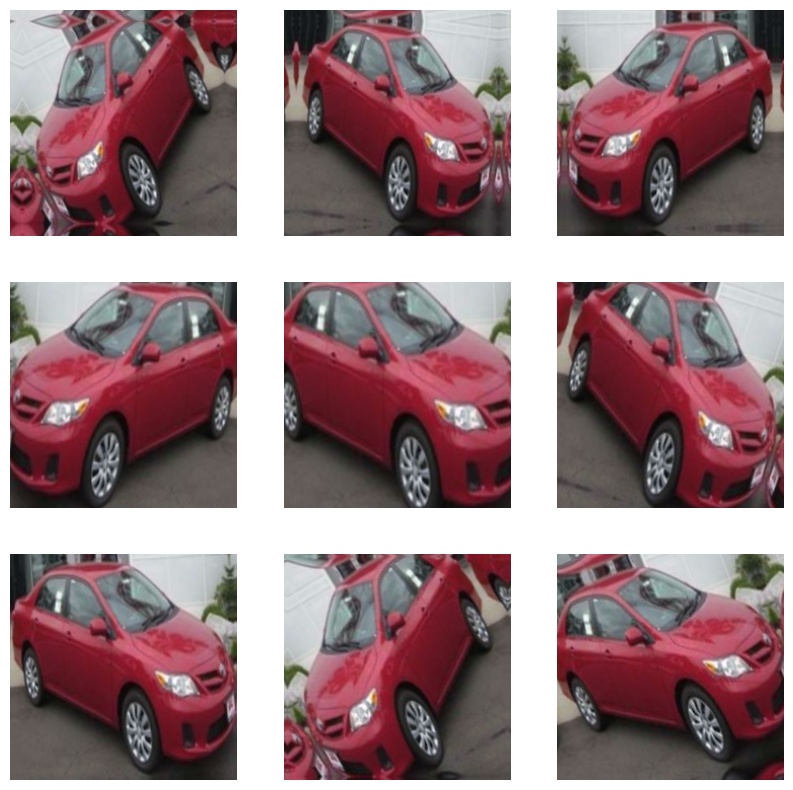

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Defining a new convnet that includes image augmentation and dropout

In [48]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(196, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

Training the regularized convnet

In [49]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
304/304 [==============================] - 30s 74ms/step - loss: 5.2224 - accuracy: 0.0094 - val_loss: 5.1650 - val_accuracy: 0.0145


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
304/304 [==============================] - 20s 65ms/step - loss: 5.1427 - accuracy: 0.0159 - val_loss: 5.1464 - val_accuracy: 0.0188
Epoch 3/10
304/304 [==============================] - 21s 67ms/step - loss: 5.0750 - accuracy: 0.0227 - val_loss: 5.0557 - val_accuracy: 0.0222
Epoch 4/10
304/304 [==============================] - 21s 68ms/step - loss: 4.9261 - accuracy: 0.0357 - val_loss: 4.8890 - val_accuracy: 0.0426
Epoch 5/10
304/304 [==============================] - 21s 70ms/step - loss: 4.7789 - accuracy: 0.0512 - val_loss: 4.8889 - val_accuracy: 0.0516
Epoch 6/10
304/304 [==============================] - 20s 66ms/step - loss: 4.6131 - accuracy: 0.0682 - val_loss: 4.5694 - val_accuracy: 0.0896
Epoch 7/10
304/304 [==============================] - 21s 70ms/step - loss: 4.4203 - accuracy: 0.0911 - val_loss: 4.3855 - val_accuracy: 0.0992
Epoch 8/10
304/304 [==============================] - 20s 65ms/step - loss: 4.2549 - accuracy: 0.1140 - val_loss: 4.4402 - val_accuracy:

# Leveraging a pretrained model

## Feature extraction with a pretrained model

Instantiating the VGG16 convolutional base

In [50]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [51]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [52]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 27ms/step


In [53]:
train_features.shape

(9711, 7, 7, 512)

Defining and training the densely connected classifier

In [54]:
inputs = keras.Input(shape=(7, 7, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(196, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.h5",
      save_best_only=True,
      monitor="val_loss")
]

In [56]:
history = model.fit(
    train_features, train_labels,
    epochs=10,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/10
304/304 [==============================] - 3s 11ms/step - loss: 169.8332 - accuracy: 0.1171 - val_loss: 126.0988 - val_accuracy: 0.2067
Epoch 2/10
 11/304 [>.............................] - ETA: 1s - loss: 55.1823 - accuracy: 0.5114

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


304/304 [==============================] - 2s 7ms/step - loss: 69.2935 - accuracy: 0.4637 - val_loss: 89.4139 - val_accuracy: 0.3701
Epoch 3/10
304/304 [==============================] - 2s 7ms/step - loss: 43.3994 - accuracy: 0.6392 - val_loss: 72.0292 - val_accuracy: 0.4754
Epoch 4/10
304/304 [==============================] - 2s 6ms/step - loss: 32.7255 - accuracy: 0.7364 - val_loss: 90.3792 - val_accuracy: 0.4569
Epoch 5/10
304/304 [==============================] - 2s 6ms/step - loss: 26.9395 - accuracy: 0.7797 - val_loss: 79.5348 - val_accuracy: 0.5070
Epoch 6/10
304/304 [==============================] - 2s 6ms/step - loss: 22.7376 - accuracy: 0.8173 - val_loss: 85.0340 - val_accuracy: 0.5202
Epoch 7/10
304/304 [==============================] - 2s 8ms/step - loss: 20.5992 - accuracy: 0.8409 - val_loss: 89.7052 - val_accuracy: 0.5215
Epoch 8/10
304/304 [==============================] - 2s 7ms/step - loss: 18.6656 - accuracy: 0.8563 - val_loss: 90.0664 - val_accuracy: 0.5416
Epo

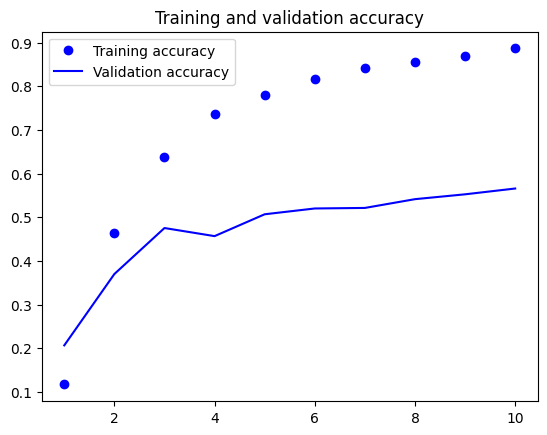

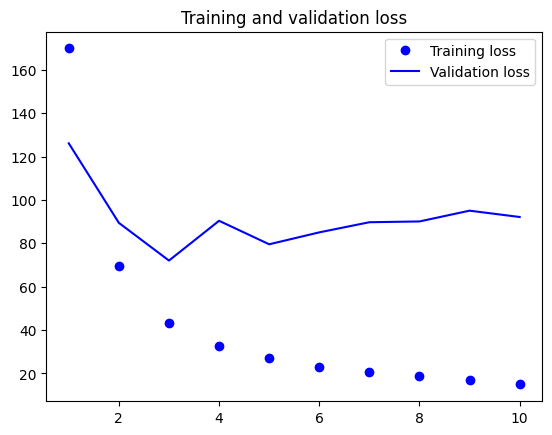

In [57]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Feature extraction together with data augmentation

Instantiating and freezing the VGG16 convolutional base

In [58]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

Adding a data augmentation stage and a classifier to the convolutional base

In [59]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(196, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [60]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.h5",
        save_best_only=True,
        monitor="val_loss")
]

In [61]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
304/304 [==============================] - ETA: 0s - loss: 171.6910 - accuracy: 0.0560

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


304/304 [==============================] - 59s 185ms/step - loss: 171.6910 - accuracy: 0.0560 - val_loss: 150.3059 - val_accuracy: 0.1211
Epoch 2/10
304/304 [==============================] - 63s 207ms/step - loss: 132.0048 - accuracy: 0.1704 - val_loss: 85.2381 - val_accuracy: 0.2984
Epoch 3/10
304/304 [==============================] - 56s 183ms/step - loss: 109.5321 - accuracy: 0.2686 - val_loss: 76.6223 - val_accuracy: 0.3812
Epoch 4/10
304/304 [==============================] - 55s 182ms/step - loss: 95.3746 - accuracy: 0.3325 - val_loss: 63.1752 - val_accuracy: 0.4575
Epoch 5/10
304/304 [==============================] - 56s 182ms/step - loss: 84.9486 - accuracy: 0.3918 - val_loss: 67.2451 - val_accuracy: 0.4572
Epoch 6/10
304/304 [==============================] - 55s 181ms/step - loss: 78.1683 - accuracy: 0.4269 - val_loss: 61.1921 - val_accuracy: 0.5091
Epoch 7/10
304/304 [==============================] - 56s 183ms/step - loss: 72.8560 - accuracy: 0.4665 - val_loss: 60.5471 -

# Fine Tuning the Model
Freezing all layers until the fourth from the last

In [69]:
conv_base.trainable = True
for layer in conv_base.layers[:-1]:
    layer.trainable = False

Fine-tuning the model

In [72]:
# model.compile(loss="sparse_categorical_crossentropy",
#               optimizer="rmsprop",
#               metrics=["accuracy"])

# callbacks = [
#     keras.callbacks.ModelCheckpoint(
#         filepath="fine_tuning.h5",
#         save_best_only=True,
#         monitor="val_loss")
# ]

In [74]:
# history = model.fit(
#     train_dataset,
#     epochs=10,
#     validation_data=validation_dataset,
#     callbacks=callbacks)

In [75]:
model = keras.models.load_model("fine_tuning.h5")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

102/102 [==============================] - 14s 128ms/step - loss: 5.2762 - accuracy: 0.0065
Test accuracy: 0.006


--END--
---
---
---


In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data_resized,
    directory=image_train_data_dir,  # Point to the image directory
    x_col="fname",  # Column containing image filenames (adjust if needed)
    y_col="class",  # Column containing class labels (adjust if needed)
    target_size=(224, 224),  # Adjust target size if needed
    batch_size=8,  # Adjust batch size as needed
    class_mode='categorical',  # Multi-class classification
    shuffle=True,  # Shuffle data for better training
    seed=42,  # For reproducibility of data shuffling and augmentations.
    # validation_split=0.2,
    subset='training',  # Specify this is for validation data
)


Found 10359 validated image filenames belonging to 196 classes.


In [ ]:
validation_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data_resized,
    directory=image_train_data_dir,  # Point to the image directory
    x_col="fname",  # Column containing image filenames (adjust if needed)
    y_col="class",  # Column containing class labels (adjust if needed)
    target_size=(224, 224),  # Adjust target size if needed
    batch_size=8,  # Adjust batch size as needed
    class_mode='categorical',  # Multi-class classification
    shuffle=True,  # Shuffle data for better training
    seed=42,  # For reproducibility of data shuffling and augmentations.
    # validation_split=0.2,
    subset='validation',  # Specify this is for validation data
)


Found 2589 validated image filenames belonging to 196 classes.


# Training the Model using CNN Sequential Mode

## Imporing ResNet50 to the Transfer learning as the training data for each class is minimal in our dataset

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [ ]:
model = Sequential([ResNet50(include_top=False, weights='imagenet', pooling='avg'), Dense(196, activation='softmax')])

In [ ]:
model.layers[0].trainable = False # Freeze the layers except for last one

In [ ]:
model

In [ ]:
# Compile the model for training with your specific optimizer and loss function
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model on your car image dataset (data preparation not shown here)
# model.fit(train_generator, your_training_labels, epochs=10)

In [ ]:
# Use the trained model for car make/model prediction on new images
# predictions = model.predict(your_new_image)

In [ ]:
len(train_generator)

1295

In [ ]:
# Train the model on the training data
# model.fit(
#     train_generator,
#     validation_generator,
#     epochs=10,  # Adjust the number of epochs as needed
#     # steps_per_epoch=len(train_generator)  # Adjust if using validation split
# )

model.fit(
    train_generator,
    epochs=50,  # Adjust according to your needs
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Epoch 1/50
1295/1295 [==============================] - 212s 163ms/step - loss: 5.5076 - accuracy: 0.0078 - val_loss: 5.4195 - val_accuracy: 0.0116
Epoch 2/50
1295/1295 [==============================] - 208s 161ms/step - loss: 5.4159 - accuracy: 0.0092 - val_loss: 5.4095 - val_accuracy: 0.0127
Epoch 3/50
1295/1295 [==============================] - 210s 162ms/step - loss: 5.3655 - accuracy: 0.0120 - val_loss: 5.3772 - val_accuracy: 0.0112
Epoch 4/50
1295/1295 [==============================] - 208s 161ms/step - loss: 5.3128 - accuracy: 0.0151 - val_loss: 5.3396 - val_accuracy: 0.0139
Epoch 5/50
1295/1295 [==============================] - 207s 160ms/step - loss: 5.2832 - accuracy: 0.0153 - val_loss: 5.2982 - val_accuracy: 0.0100
Epoch 6/50
1295/1295 [==============================] - 207s 160ms/step - loss: 5.2468 - accuracy: 0.0188 - val_loss: 5.2794 - val_accuracy: 0.0143
Epoch 7/50
1295/1295 [==============================] - 207s 160ms/step - loss: 5.2155 - accuracy: 0.0195 - val_

> **NOTE:** It is best to have validation set for evaluating the performance